<img src="../files/misc/logo.gif" width=300/>
<h1 style="color:#872325"> Plotting </h1>

![matplotlib](https://matplotlib.org/_static/logo2.png)

In [1]:
import matplotlib.pyplot as plt

In [2]:
# Para instalar esta libreria desde la línea de comandos:
# pip install pydataset
from pydataset import data

## The Basics 

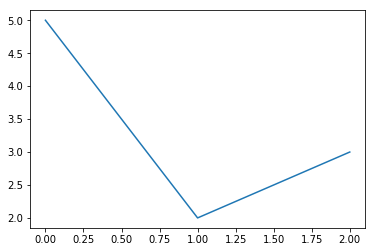

In [7]:
plt.plot([5,2,3])
plt.show()

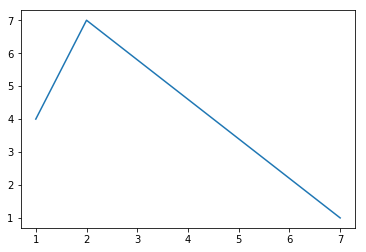

In [4]:
x, y = [1, 2, 7], [4, 7, 1]
plt.plot(x, y)
plt.show()

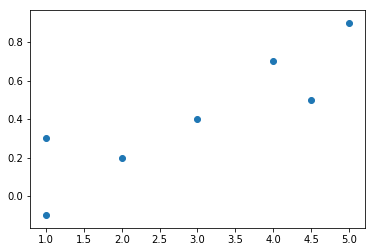

In [10]:
x1, x2 = [1, 1, 2, 3, 4, 5, 4.5], [-0.1, 0.3, 0.2, 0.4, 0.7, 0.9, 0.5]
plt.scatter(x1, x2)
plt.show()

In [11]:
from numpy.random import randint

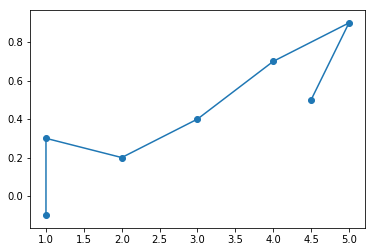

In [6]:
x1, x2 = [1, 1, 2, 3, 4, 5, 4.5], [-0.1, 0.3, 0.2, 0.4, 0.7, 0.9, 0.5]
plt.scatter(x1, x2)
plt.plot(x1, x2)
plt.show()

## The basic styles 

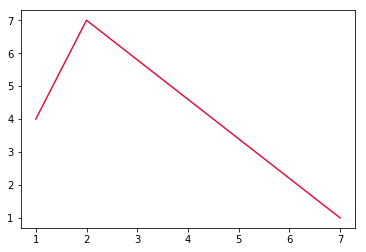

In [15]:
x, y = [1, 2, 7], [4, 7, 1]
plt.plot(x, y, color="crimson")
plt.show()

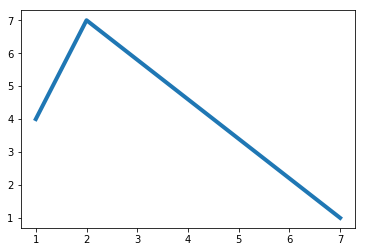

In [16]:
x, y = [1, 2, 7], [4, 7, 1]
plt.plot(x, y, linewidth=4)
plt.show()

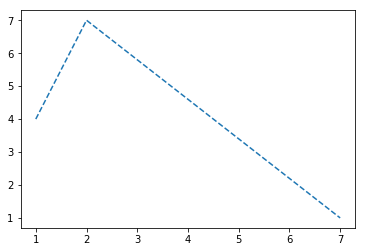

In [9]:
x, y = [1, 2, 7], [4, 7, 1]
plt.plot(x, y, linestyle="dashed")
plt.show()

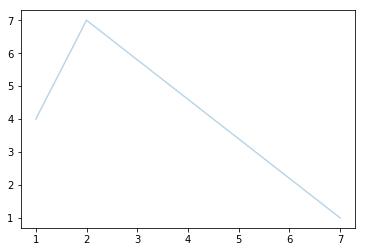

In [19]:
x, y = [1, 2, 7], [4, 7, 1]
plt.plot(x, y, alpha=0.3)
plt.show()

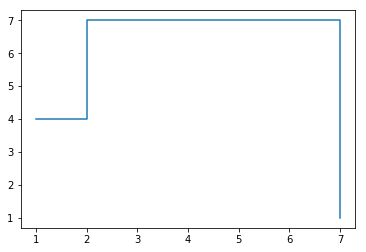

In [11]:
x, y = [1, 2, 7], [4, 7, 1]
plt.plot(x, y, drawstyle="steps-post")
plt.show()

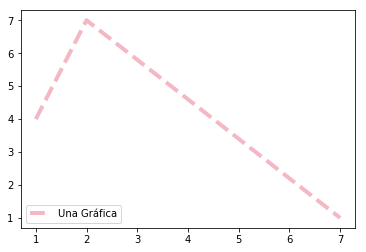

In [27]:
x, y = [1, 2, 7], [4, 7, 1]
plt.plot(x, y, color="crimson", linewidth=4, alpha=0.3,
         linestyle="dashed" ,label="Una Gráfica")
plt.legend(loc="lower left")
plt.show()

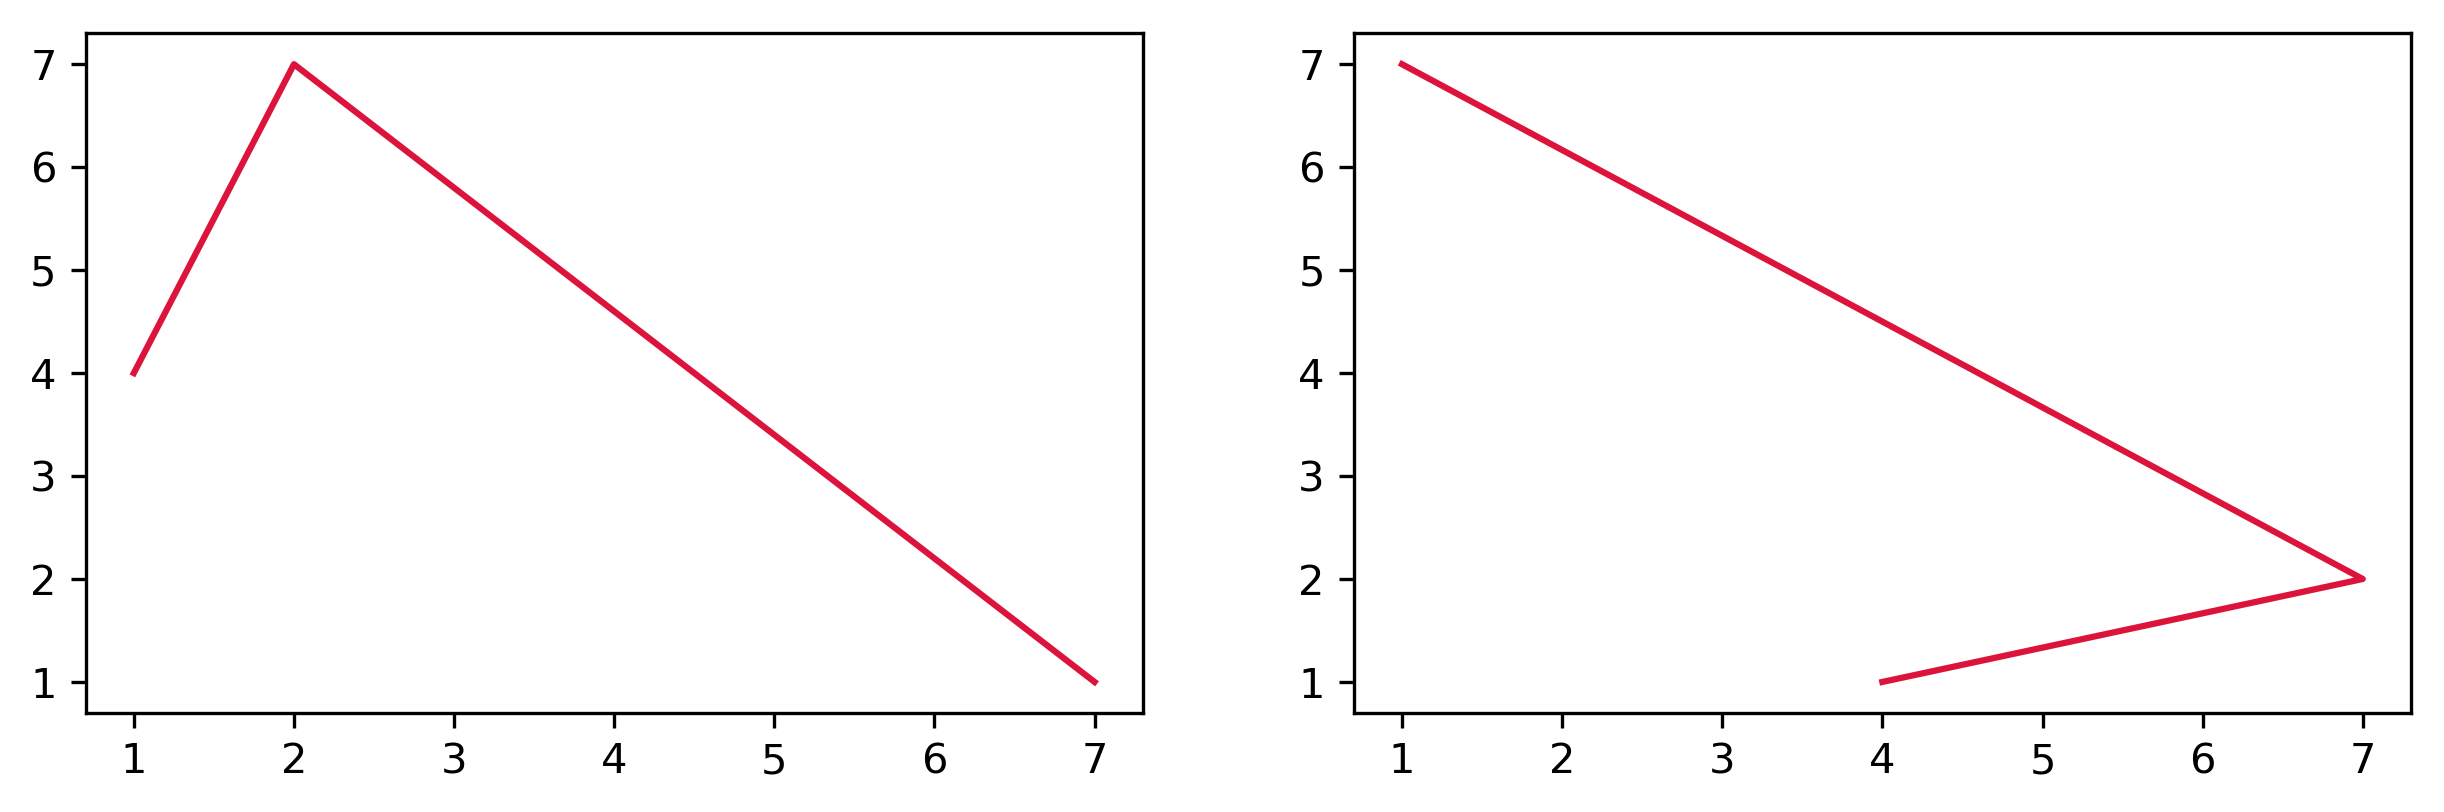

In [61]:
fig = plt.figure(figsize=(10, 3), dpi=300)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(x, y, color="crimson")
ax2.plot(y, x, color="crimson")

fig.savefig("/Users/gerardoduran/Desktop/img.png")

<h2 style="color:crimoson">Ejercicio</h2>
Usando unicamente Python y matplotlib, grafica $f(x) = x^2$ dentro de $[-1, 1]$.

## Otros ejemplos

In [14]:
iris = data("iris")
iris["sepal_area"] = iris["Sepal.Length"] * iris["Sepal.Width"]
iris["petal_area"] = iris["Petal.Length"] * iris["Petal.Width"]

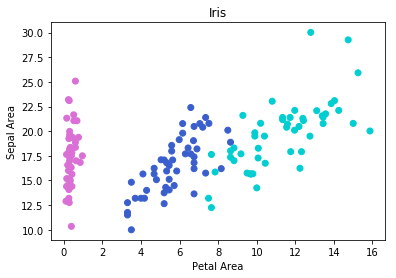

In [15]:
def iriscolors(species):
    species_dict = {"setosa": "#DA70D6",
                    "versicolor": "#3A5FCD",
                    "virginica": "#00CED1"}
    return species_dict[species]

irisc = [iriscolors(fl) for fl in iris["Species"]]
plt.scatter(iris["petal_area"], iris["sepal_area"], c=irisc)
plt.xlabel("Petal Area")
plt.ylabel("Sepal Area")
plt.title("Iris")
plt.show()

## Plotting with Numpy 

In [16]:
import numpy as np

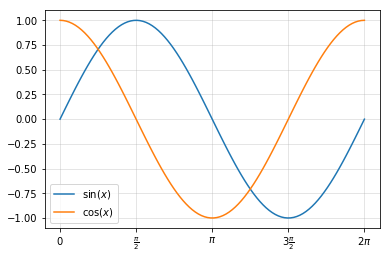

In [17]:
x = np.linspace(0, 2 * np.pi, 100)
plt.grid(alpha=0.4)
plt.plot(x, np.sin(x), label=r"$\sin(x)$")
plt.plot(x, np.cos(x), label=r"$\cos(x)$")
plt.xticks([0, np.pi/2, np.pi, 3 * np.pi / 2, 2 * np.pi],
           ["$0$", r"$\frac{\pi}{2}$", "$\pi$" ,r"$3\frac{\pi}{2}$", r"$2\pi$"])
plt.legend()
plt.show()

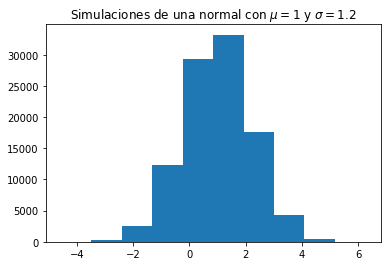

In [18]:
simul = np.random.normal(loc=1, scale=1.2, size=100_000)
plt.title(r"Simulaciones de una normal con $\mu=1$ y $\sigma=1.2$")
plt.hist(simul)
plt.show()

/Users/gerardoduran/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


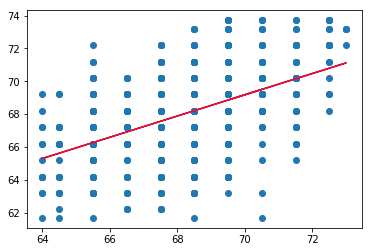

In [19]:
galton = data("Galton")

A = np.c_[galton[["parent"]].values , np.ones_like(galton[["parent"]].values)]
b, a = np.linalg.lstsq(A, galton[["child"]])[0]
plt.scatter(galton["parent"], galton["child"])
plt.plot(galton["parent"], a + b * galton["parent"], c="crimson")
plt.show()

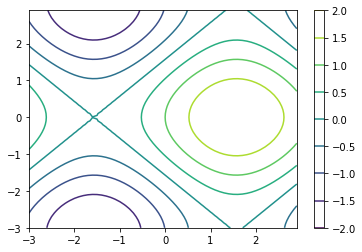

In [20]:
x, y = np.mgrid[-3:3:0.1, -3:3:0.1]
z = np.sin(x) + np.cos(y)
plot = plt.contour(x, y, z, cmap="viridis")
plt.colorbar(plot)
plt.show()

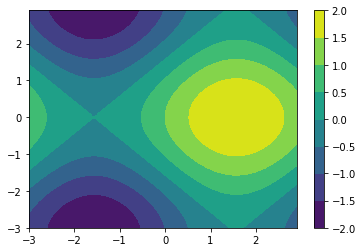

In [21]:
x, y = np.mgrid[-3:3:0.1, -3:3:0.1]
z = np.sin(x) + np.cos(y) 
plot = plt.contourf(x, y, z, cmap="viridis")
plt.colorbar(plot)
plt.show()

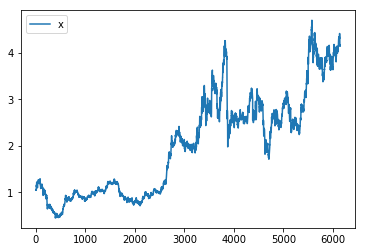

In [22]:
(1 + data("bmw")).cumprod().plot()
plt.show()

# Seaborn 

In [23]:
import seaborn as sns

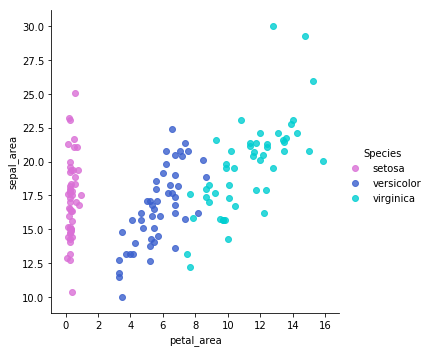

In [24]:
species_dict = {"setosa": "#DA70D6",
                "versicolor": "#3A5FCD",
                "virginica": "#00CED1"}

sns.lmplot("petal_area", "sepal_area", hue="Species", fit_reg=False, data=iris,
           palette=species_dict)
plt.show()

/Users/gerardoduran/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


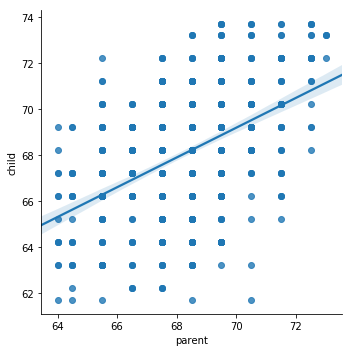

In [25]:
sns.lmplot("parent", "child", data=galton)
plt.show()

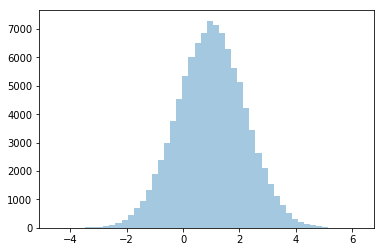

In [26]:
sns.distplot(simul, kde=False)
plt.show()

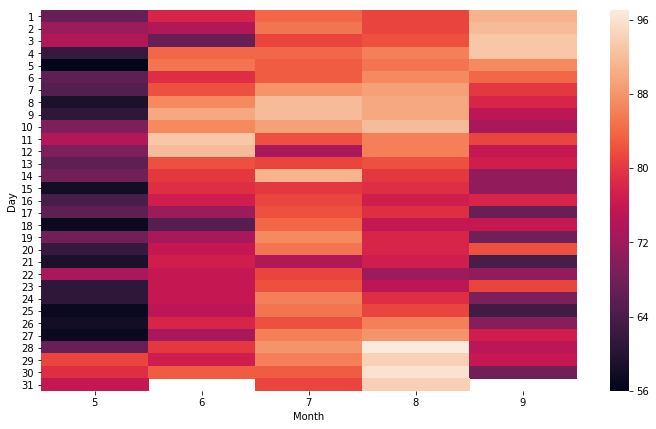

In [27]:
airq = data("airquality")
airqpt = airq.pivot_table(index="Day", columns="Month", values="Temp")

plt.figure(figsize=(12,7))
sns.heatmap(airqpt)
plt.show()

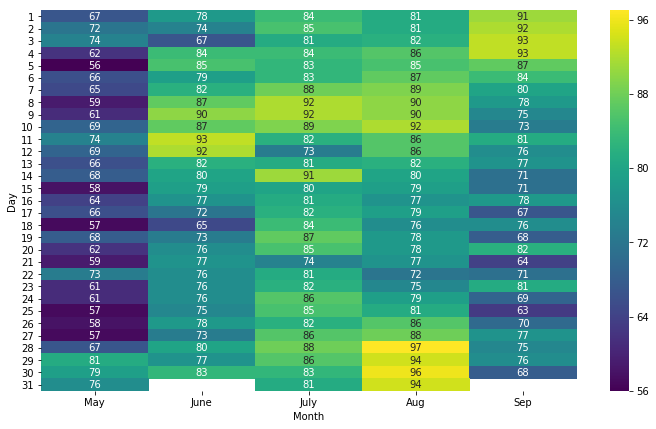

In [28]:
plt.figure(figsize=(12,7))
sns.heatmap(airqpt, cmap="viridis", annot=True,
            xticklabels=["May", "June", "July", "Aug", "Sep"])
plt.show()

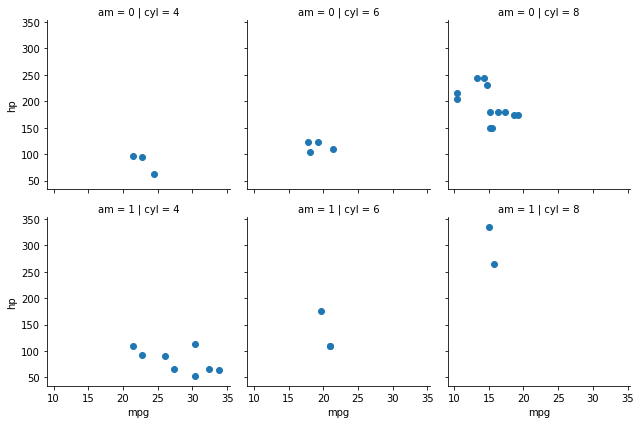

In [29]:
cars = data("mtcars")
graph = sns.FacetGrid(col="cyl", row="am", data=cars)
graph.map(plt.scatter, "mpg", "hp")

plt.show()

# 3D plotting

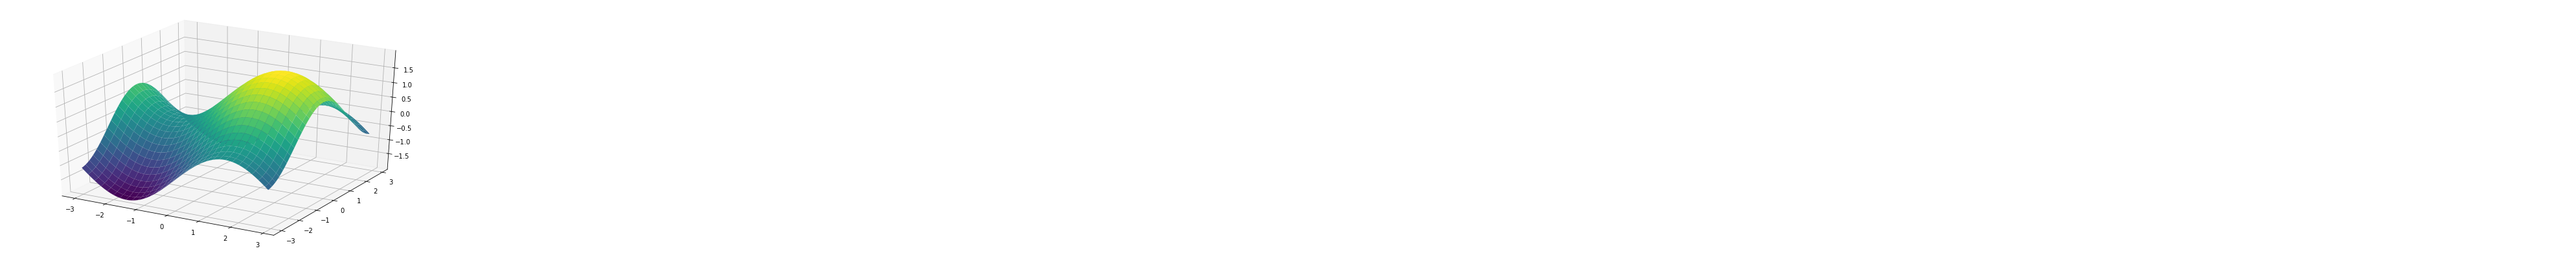

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection="3d")

x, y = np.mgrid[-3:3:0.1, -3:3:0.1]
z = np.sin(x) + np.cos(y) 

ax.plot_surface(x, y, z, cmap="viridis")
plt.show()

# SciPy 
[Scipy](https://scipy.org/scipylib/index.html) es una colección de algorítmos matemáticos escritos sobre la librería Numpy.

SciPy se divide en diferentes *sub-paquetes*, cada uno enfocado en un área. En esta clase veremos solo algunas de las funciones de SciPy, para conocer todo sobre estos sub-paquetes puedes ver este [link](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html)

----
## Integrando Numéricamente
[`scipy.integrate`](https://docs.scipy.org/doc/scipy/reference/integrate.html)

In [15]:
from scipy.integrate import quad

Integrando
$$
    \int_0^2 x^2 dx
$$

In [16]:
quad(lambda x: x**2, 0, 2)

(2.666666666666667, 2.960594732333751e-14)

In [21]:
np.sqrt(2 * np.pi)

2.5066282746310002

<h2 style="color:crimson">Ejercicio</h2>

Usando la función `quad`, evalua la siguiente integral
$$
    \frac{1}{\sqrt{2\pi}}\int_{0}^{\infty} e^{-\frac{1}{2}x^2} dx
$$

**hint**: Numpy puede trabajar con representaciones de números múy grandes usando `np.inf`

----
## Optimización
[`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html)

In [8]:
from scipy.optimize import minimize

In [28]:
opt = minimize(lambda x: x**2, 2)
opt

      fun: 3.5662963072207506e-16
 hess_inv: array([[ 0.5]])
      jac: array([ -2.28681190e-08])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([ -1.88846401e-08])

In [29]:
opt.x

array([ -1.88846401e-08])

In [30]:
opt.fun

3.5662963072207506e-16

In [21]:
minimize(lambda x: np.sin(x), 0.1)

      fun: -0.9999999999999964
 hess_inv: array([[ 1.00005774]])
      jac: array([  9.68575478e-08])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-1.57079624])

In [22]:
minimize(lambda x: np.sin(x), 2)

      fun: -1.0
 hess_inv: array([[ 6.51988556]])
      jac: array([  7.45058060e-09])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 2
     njev: 8
   status: 0
  success: True
        x: array([ 4.71238898])

In [26]:
# Minimizando una función de dos variables
minimize(lambda x: np.sin(x[0]) * np.cos(x[1]), [1,1])

      fun: -0.9999999999999453
 hess_inv: array([[ 1.01965375,  0.01208235],
       [ 0.01208235,  1.0074226 ]])
      jac: array([  2.90572643e-07,   1.78813934e-07])
  message: 'Optimization terminated successfully.'
     nfev: 44
      nit: 10
     njev: 11
   status: 0
  success: True
        x: array([ 1.57079661,  3.14159283])

----
## Interpolación
`scipy.integrate`

In [5]:
x = np.arange(6)
xarr = np.linspace(0, 5, 100)
y = np.array([0, -1, 2, 3, 1, 1])

In [10]:
import scipy.interpolate

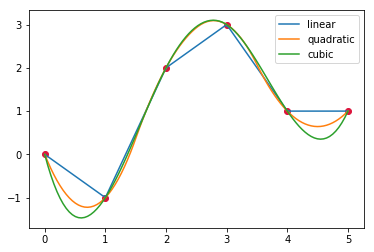

In [17]:
plt.scatter(x, y, color="crimson")
kinds = ["linear", "quadratic", "cubic"]
for kind in kinds:
    f = scipy.interpolate.interp1d(x, y, kind=kind)
    plt.plot(xarr, f(xarr), label=kind)
plt.legend()    
plt.show()